In [35]:
# Particle position (x, y) with the angular velocity
class Particle:
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel
    

# Keep track of the positions of the particles
class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
    
    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        
        for i in range(nsteps):
            for p in self.particles:
                # Compute  the velocity in directions of x and y
                # Know the direction of movement along x and y (Pitagoras)
                v_x = -p.y / (p.x ** 2 + p.y ** 2) ** 0.5
                v_y = p.x / (p.x ** 2 + p.y ** 2) ** 0.5

                # We can approximate the cirular trajectory by dividing the time, t, into smaller steps, dt.
                # So we calculate the displacement (time step * angular velocity * direction of motion)
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y
                
                # We update the values
                p.x += d_x
                p.y += d_y
                
                # Repeat

In [36]:
import matplotlib.pyplot as plt
from matplotlib import animation # create an animation of the evolution

def visualize(simulator: ParticleSimulator):
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]
    
    # Create the plot figure
    fig = plt.figure()
    
    # Create the axis and line
    ax = plt.subplot(
        111, aspect='equal'
    )
    line, = ax.plot(X, Y, 'ro')
    
    # Define axis limits
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    
    # Function that wil run when the animation starts
    def init():
        # Will start the line at position (0, 0)
        line.set_data([], [])
        return line, 

    # Define the animate function
    def animate(i):
        # Let the particle evolve for 0.01 units
        simulator.evolve(0.01)
        
        # Track the new positions
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]
            
        # Update the position of the line
        line.set_data(X, Y)
        return line, 

    # And we call the animate function each 10 ms
    anim = animation.FuncAnimation(
        fig,
        animate,
        init_func=init,
        blit=True,
        interval=10
    )
    
    plt.show()

In [37]:
def test_visualize():
    particles = [
        Particle(0.3, 0.5, 1),
        Particle(0.0, -0.5, -1),
        Particle(-0.1, -0.4, 3)
    ]
    
    simulator = ParticleSimulator(particles)
    
    visualize(simulator)

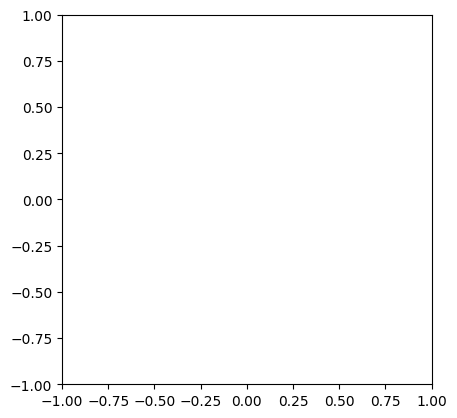

In [38]:
test_visualize()

In [34]:
def test_evolve():
    particles = [
        Particle(0.3, 0.5, 1),
        Particle(0.0, -0.5, -1),
        Particle(-0.1, -0.4, 3)
    ]
    
    simulator = ParticleSimulator(particles)
    
    # De-structure the list
    p0, p1, p2 = particles
    
    def fequal(a, b, eps=1e-5):
        return abs(a - b) < eps
    
    assert fequal(p0.x, 0.210269)
    assert fequal(p0.y, 0.543863)
    
    assert fequal(p1.x, -0.099334)
    assert fequal(p1.y, -0.490034)
    
    assert fequal(p2.x, 0.191358)
    assert fequal(p2.y, -0.365227)

test_evolve()

AssertionError: 